In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import scipy.io
np.set_printoptions(threshold=np.nan)

import os
import copy
%load_ext autotime

In [2]:
from scipy.io import wavfile
from scipy.signal import resample
from scipy.signal import hilbert

time: 3.77 ms


In [3]:
path = os.path.join('/Users/sherrychien/Desktop/mont/sherry/parachute/stimuli/parachute_intact_audenv_385.mat')
a1 = scipy.io.loadmat(path)
env_intact=np.reshape(a1['audenv'],((385)))
audioenv_intact= env_intact[:]

time: 218 ms


In [4]:
path = os.path.join('/Users/sherrychien/Desktop/mont/sherry/parachute/stimuli/parachute_longscram_audenv_385.mat')
a1 = scipy.io.loadmat(path)
env_ls=np.reshape(a1['audenv'],((385)))
audioenv_ls= env_ls[:]

time: 114 ms


In [5]:
duration = [26582,17753,20779,19543,22929,19147,22160,23415,20391,21923,26193,19517,15408,17716,15475,\
            15406,25344,28487,29716,18088,17271,29857,24453,24342,24442]
duration = [np.ceil(x/20) for x in duration]
duration = np.asarray(duration)
duration = duration.astype(int)

time: 7.6 ms


In [6]:
print(duration)

[1330  888 1039  978 1147  958 1108 1171 1020 1097 1310  976  771  886  774
  771 1268 1425 1486  905  864 1493 1223 1218 1223]
time: 3.01 ms


In [7]:

i=0
intact_env=[]

for j in range(len(duration)):
    intact_env.append(audioenv_intact[i:i+duration[j]])
    i=i+duration[j]
    print(i)

1330
2218
3257
4235
5382
6340
7448
8619
9639
10736
12046
13022
13793
14679
15453
16224
17492
18917
20403
21308
22172
23665
24888
26106
27329
time: 11.6 ms


In [8]:
np.sum(duration)

27329

time: 7.03 ms


In [9]:
duration[-1]=1217
np.sum(duration)

27323

time: 4.59 ms


In [10]:

order=[4,23,8,24,18,7,0,17,22,16,2,12,15,9,20,13,5,14,11,19,6,21,1,10,3]
order1 = [6,22,10,24,0,16,20,5,2,13,23,18,11,15,17,12,9,7,4,19,14,21,8,1,3]


duration_ls = [duration[j] for j in order]
duration_ls 
# plt.plot(w)

[1147,
 1218,
 1020,
 1217,
 1486,
 1171,
 1330,
 1425,
 1223,
 1268,
 1039,
 771,
 771,
 1097,
 864,
 886,
 958,
 774,
 976,
 905,
 1108,
 1493,
 888,
 1310,
 978]

time: 16.5 ms


In [11]:
i=0
ls_env=[]

for j in range(len(duration_ls)):
    ls_env.append(audioenv_ls[i:i+duration_ls[j]])
    i=i+duration_ls[j]

ul_env = [ls_env[j] for j in order1]
ul_env_ravel = np.concatenate(ul_env).ravel()

time: 9.08 ms


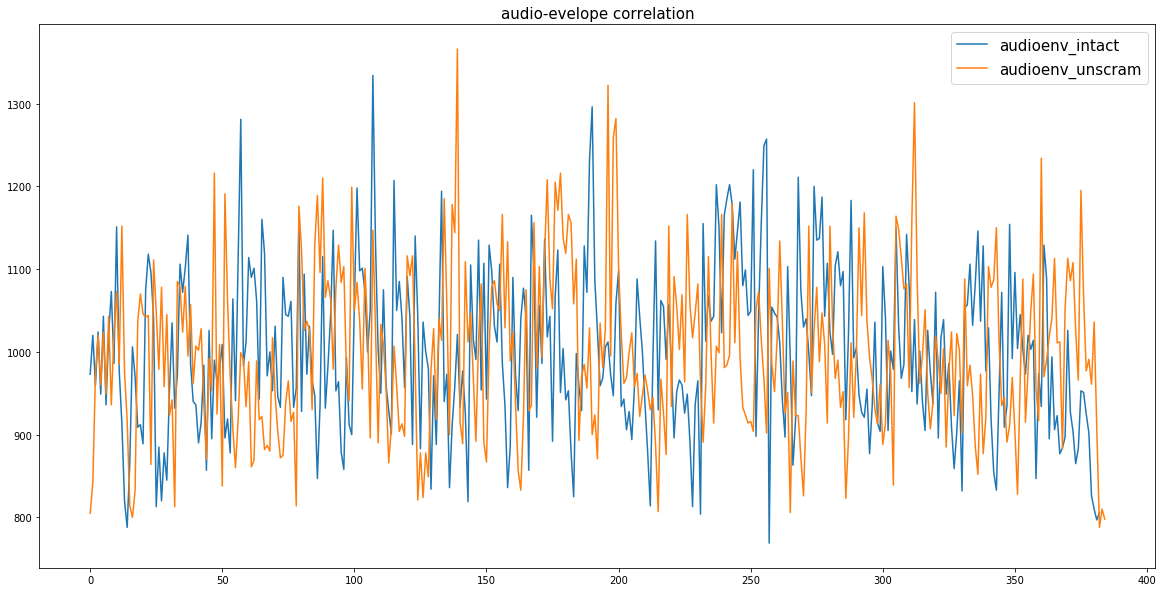

time: 842 ms


In [12]:
# Check whether the intact and unscramble audio envelope matched
plt.figure(figsize=(20,10))
plt.title("audio-evelope correlation", fontsize=15)
plt.plot(audioenv_intact[2:2000], label="audioenv_intact")
plt.plot(ul_env_ravel[:2000], label="audioenv_unscram")
plt.legend(fontsize=15)

plt.show()

In [13]:
for i in range(5):
    print(np.corrcoef(audioenv_intact[:27323-i],ul_env_ravel[i:]))

[[ 1.          0.04553624]
 [ 0.04553624  1.        ]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

time: 291 ms


In [ ]:
# Check whether the intact and unscramble audio envelope matched
plt.figure(figsize=(20,10))
plt.title("audio-evelope correlation", fontsize=15)
plt.plot(audioenv_intact[2:2000], label="audioenv_intact")
plt.plot(ul_env_ravel[:2000], label="audioenv_unscram")
plt.legend(fontsize=15)

plt.show()

In [111]:
it_tc=np.mean(a1_BOLD_ls,2)

time: 7.65 ms


In [112]:
it_tc_sbj=np.mean(it_tc,0)

time: 1.71 ms


In [123]:
np.shape(audioenv_ls)

(368,)

time: 4.25 ms


In [132]:
for t in range(1):
    print (t)
    print(np.corrcoef(it_tc_sbj[22:390],audioenv_ls[17:385]))

0
[[ 1.          0.37541855]
 [ 0.37541855  1.        ]]
time: 8.16 ms


# upsampling the data

In [16]:
import os
import copy
from scipy import stats
a1_BOLD_intact = []
PMC_BOLD_intact = []
name_intact = 'MSS_173031','MMX_174331','JKF_181331','JFQ_181531','JEX_181531','JQM_191331',\
'JLN_192031','SBX_213031','MBX_172331','JFX_181531','JBU_181531','JHS_183431',\
'JFG_183631','JEQ_183731','JEO_184131','NOT_231331','NWS_231831','NMA_231931',\
'NTE_232031','NUH_232131','NED_232431','JSC_193231'
for n in range(len(name_intact)):
    path = os.path.join('/Users/sherrychien/Desktop/mont/sherry/parachute/subjects',name_intact[n],'notthefall_intact/a1_3mm_trans_filtered_func_data.mat')
    path1 = os.path.join('/Users/sherrychien/Desktop/mont/sherry/parachute/subjects',name_intact[n],'notthefall_intact/post_cing_precun_3mm_trans_filtered_func_data.mat')
    a1 = scipy.io.loadmat(path)
    pmc = scipy.io.loadmat(path1)        
    BOLD = copy.deepcopy(a1['rdata'])
    BOLD1 = copy.deepcopy(pmc['rdata'])
    mean_t=np.mean(BOLD,1)
    mean_t1=np.mean(BOLD1,1)
    for t in range(400):        
        for i in range(len(mean_t)):
            BOLD[i,t] = BOLD[i,t] - mean_t[i]
        for j in range(len(mean_t1)):
            BOLD1[j,t] = BOLD1[j,t] - mean_t1[j]
            
            
    a1_BOLD_intact.append(BOLD)
    PMC_BOLD_intact.append(BOLD1)
    


a1_BOLD_intact= np.asarray(a1_BOLD_intact)
PMC_BOLD_intact= np.asarray(PMC_BOLD_intact)
a1_BOLD_intact=np.swapaxes(a1_BOLD_intact,1,2)
PMC_BOLD_intact=np.swapaxes(PMC_BOLD_intact,1,2)

time: 2min 38s


In [17]:
import os
import copy
a1_BOLD_ls = []
PMC_BOLD_ls = []
name_longscram = 'JSC_193231','JNB_193231','ANT_201531','AFI_201731','AKT_202131','ATE_203131',\
'SLC_212531','OTA_222031','JTH_193431','JGT_194031','ADI_201431','AHQ_201531',\
'AEH_203631','SLT_212131','SQT_212731','SCE_212731','OKX_222031','OMT_222431',\
'OFO_223331','NTN_231731','DSN_241831','DEY_242731'
for n in range(len(name_longscram)):
    path = os.path.join('/Users/sherrychien/Desktop/mont/sherry/parachute/subjects',name_longscram[n],'notthefall_longscram/a1_3mm_trans_filtered_func_data.mat')
    path1 = os.path.join('/Users/sherrychien/Desktop/mont/sherry/parachute/subjects',name_longscram[n],'notthefall_longscram/post_cing_precun_3mm_trans_filtered_func_data.mat')
    a1 = scipy.io.loadmat(path)
    pmc = scipy.io.loadmat(path1)        
    BOLD = copy.deepcopy(a1['rdata'])
    BOLD1 = copy.deepcopy(pmc['rdata'])
    mean_t=np.mean(BOLD,1)
    mean_t1=np.mean(BOLD1,1)
    for t in range(400):        
        for i in range(len(mean_t)):
            BOLD[i,t] = BOLD[i,t] - mean_t[i]
        for j in range(len(mean_t1)):
            BOLD1[j,t] = BOLD1[j,t] - mean_t1[j]
            
            
    a1_BOLD_ls.append(BOLD)
    PMC_BOLD_ls.append(BOLD1)

a1_BOLD_ls= np.asarray(a1_BOLD_ls)
PMC_BOLD_ls= np.asarray(PMC_BOLD_ls)
a1_BOLD_ls=np.swapaxes(a1_BOLD_ls,1,2)
PMC_BOLD_ls=np.swapaxes(PMC_BOLD_ls,1,2)

time: 2min 36s


In [18]:
n_sbj,_,_=np.shape(a1_BOLD_ls)

time: 1.55 ms


In [19]:

a1_intact_crop=[]
PMC_intact_crop=[]
a1_ls_crop=[]
PMC_ls_crop=[]

for s in range(n_sbj):
    a1_intact_crop.append(a1_BOLD_intact[s,22:390,:])
    PMC_intact_crop.append(PMC_BOLD_intact[s,22:390,:])
    a1_ls_crop.append(a1_BOLD_ls[s,22:390,:])
    PMC_ls_crop.append(PMC_BOLD_ls[s,22:390,:])
    


a1_intact_crop=np.asarray(a1_intact_crop)
PMC_intact_crop=np.asarray(PMC_intact_crop)
a1_ls_crop=np.asarray(a1_ls_crop)
PMC_ls_crop=np.asarray(PMC_ls_crop)
n, t, v_a1 = np.shape(a1_intact_crop)
_,_,v_pmc = np.shape(PMC_intact_crop)


time: 205 ms


In [20]:
#upsampling the data from 368 to 54646 (10ms base)
from scipy import signal
a1_intact_resam, PMC_intact_resam, a1_ls_resam, PMC_ls_resam=([] for i in range(4))

n, t, v_a1 = np.shape(a1_intact_crop)
_,_,v_pmc = np.shape(PMC_intact_crop)

for s in range(22):
    print(s)
    a1_it_sbj=[]
    PMC_it_sbj=[]
    a1_ls_sbj=[]
    PMC_ls_sbj=[]
    print("a1 resampling")
    for v in range(v_a1):
        a1_it_sbj.append(signal.resample(a1_intact_crop[s,:,v],27323))
        a1_ls_sbj.append(signal.resample(a1_ls_crop[s,:,v],27323))
    print("PMC resampling")
    for v in range(v_pmc):
        PMC_it_sbj.append(signal.resample(PMC_intact_crop[s,:,v],27323))
        PMC_ls_sbj.append(signal.resample(PMC_ls_crop[s,:,v],27323))
        
    a1_intact_resam.append(a1_it_sbj) #after upsampling -> [sbj, voxel, timepoints] i.e. [22, 1018, 546337]
    PMC_intact_resam.append(PMC_it_sbj)
    a1_ls_resam.append(a1_ls_sbj)
    PMC_ls_resam.append(PMC_ls_sbj)



0
a1 resampling
PMC resampling
1
a1 resampling
PMC resampling
2
a1 resampling
PMC resampling
3
a1 resampling
PMC resampling
4
a1 resampling
PMC resampling
5
a1 resampling
PMC resampling
6
a1 resampling
PMC resampling
7
a1 resampling
PMC resampling
8
a1 resampling
PMC resampling
9
a1 resampling
PMC resampling
10
a1 resampling
PMC resampling
11
a1 resampling
PMC resampling
12
a1 resampling
PMC resampling
13
a1 resampling
PMC resampling
14
a1 resampling
PMC resampling
15
a1 resampling
PMC resampling
16
a1 resampling
PMC resampling
17
a1 resampling
PMC resampling
18
a1 resampling
PMC resampling
19
a1 resampling
PMC resampling
20
a1 resampling
PMC resampling
21
a1 resampling
PMC resampling
time: 9min 46s


In [ ]:
# np.save("a1_intact_resam.npy",a1_intact_resam)
# np.save("PMC_intact_resam.npy",PMC_intact_resam)
# np.save("a1_ls_resam.npy",a1_ls_resam)
# np.save("PMC_ls_resam.npy",PMC_ls_resam)

In [ ]:
a1_intact_resam=np.load("a1_intact_resam.npy")
PMC_intact_resam=np.load("PMC_intact_resam.npy")
a1_ls_resam=np.load("a1_ls_resam.npy")
PMC_ls_resam=np.load("PMC_ls_resam.npy")

In [21]:
# unscramble the upsampled longscramble data
a1_ul_all=[]
for s in range(22):
    a1_ul_seg=[]
    for v in range(1018):
        i=0
        a1_ls_seg_voxel=[]
        for j in range(len(duration_ls)):
            a1_ls_seg_voxel.append(a1_ls_resam[s][v][i:i+duration_ls[j]])   
            i=i+duration_ls[j]
        a1_ul = [a1_ls_seg_voxel[j] for j in order1]
        a1_ul_ravel = np.concatenate(a1_ul).ravel()
        a1_ul_seg.append(a1_ul_ravel)
        
    a1_ul_all.append(a1_ul_seg)



time: 2min 14s


In [22]:
# unscramble the upsampled longscramble data
PMC_ul_all=[]
for s in range(22):
    PMC_ul_seg=[]
    for v in range(v_pmc):
        i=0
        PMC_ls_seg_voxel=[]
        for j in range(len(duration_ls)):
            PMC_ls_seg_voxel.append(PMC_ls_resam[s][v][i:i+duration_ls[j]])
            i=i+duration_ls[j]            
        PMC_ul = [PMC_ls_seg_voxel[j] for j in order1]
        PMC_ul_ravel = np.concatenate(PMC_ul).ravel()
        PMC_ul_seg.append(PMC_ul_ravel)
        
    PMC_ul_all.append(PMC_ul_seg)


time: 1min 23s


In [23]:
uls_pmc = np.asarray(PMC_ul_all)
uls_a1 = np.asarray(a1_ul_all)
it_pmc = np.asarray(PMC_intact_resam)
it_a1 = np.asarray(a1_intact_resam)

time: 5min 23s


In [24]:
#average the pattern to get the time course
it_tc_a1=np.mean(it_a1,1)
it_tc_pmc=np.mean(it_pmc,1)
uls_tc_a1=np.mean(uls_a1,1)
uls_tc_pmc=np.mean(uls_pmc,1)

time: 3min 11s


In [25]:
#z-score the time course
for s in range(22):
    it_tc_a1[s] = stats.zscore(it_tc_a1[s])
    it_tc_pmc[s] = stats.zscore(it_tc_pmc[s]) 
    uls_tc_a1[s] = stats.zscore(uls_tc_a1[s]) 
    uls_tc_pmc[s] = stats.zscore(uls_tc_pmc[s]) 

time: 270 ms


In [38]:
sbj_mean_it_A1=np.mean(it_a1,0)
sbj_mean_ul_A1=np.mean(uls_a1,0)
sbj_mean_it_pmc=np.mean(it_pmc,0)
sbj_mean_ul_pmc=np.mean(uls_pmc,0)

time: 2min 30s


In [71]:
#1 unscram-the other unscram audio envelope correlation
ind=np.arange(22)
r_tc_a1, r_tc_pmc = ([] for i in range(2))
delay=100
for s in range(22):
    a = ind[np.arange(len(ind))!= s]
    i=0
    r_seg_a1=[]
    r_seg_pmc=[]
    for seg in duration:
        other_a1 = np.mean(it_tc_a1[a,i+delay:i+seg],0)
        other_pmc = np.mean(it_tc_pmc[a,i+delay:i+seg],0)
        r_seg_a1.append(np.corrcoef(other_a1,uls_tc_a1[s,i+delay:i+seg])[0][1])
        r_seg_pmc.append(np.corrcoef(other_pmc,uls_tc_pmc[s,i+delay:i+seg])[0][1])
        i = i + seg
                         
    r_tc_a1.append(r_seg_a1)
    r_tc_pmc.append(r_seg_pmc)

time: 306 ms


In [69]:
duration

array([1330,  888, 1039,  978, 1147,  958, 1108, 1171, 1020, 1097, 1310,
        976,  771,  886,  774,  771, 1268, 1425, 1486,  905,  864, 1493,
       1223, 1218, 1217])

time: 7.8 ms


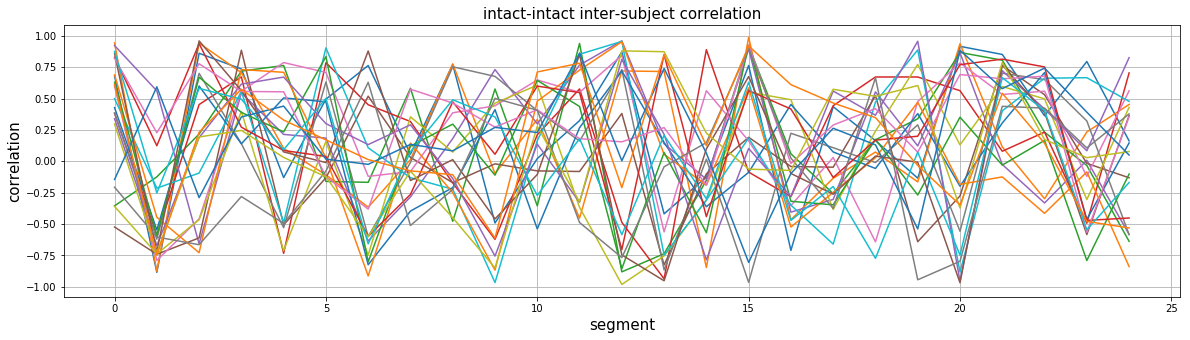

time: 732 ms


In [59]:
plt.figure(figsize=(20,5))
plt.plot(np.transpose(r_tc_a1))
plt.xlabel('segment', fontsize = 15)
plt.ylabel('correlation', fontsize = 15)
plt.title('intact-intact inter-subject correlation', fontsize = 15)
# plt.legend(label_sbj)
plt.grid()
plt.show()

In [62]:
np.mean(np.mean(r_tc_a1,1))

0.17549140083191136

time: 4.62 ms


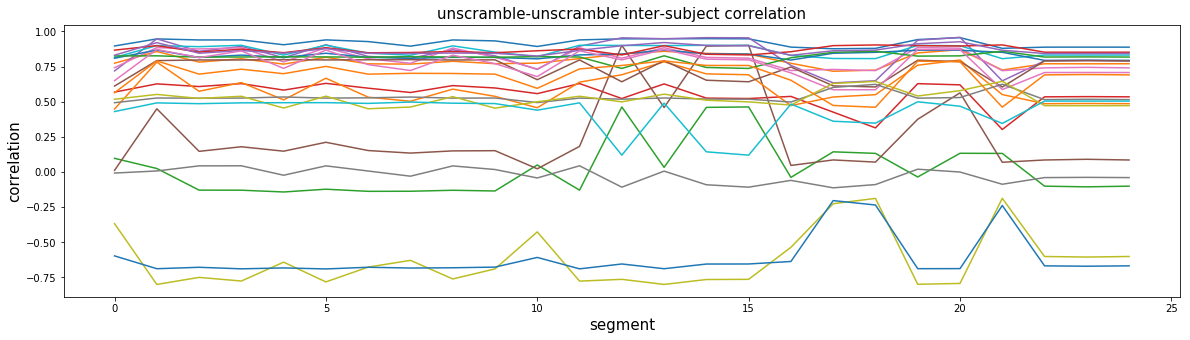

time: 639 ms


In [195]:
plt.figure(figsize=(20,5))
plt.plot(np.transpose(r_tc_a1))
plt.xlabel('segment', fontsize = 15)
plt.ylabel('correlation', fontsize = 15)
plt.title('unscramble-unscramble inter-subject correlation', fontsize = 15)
plt.legend()
plt.show()

In [39]:
np.corrcoef(np.mean(sbj_mean_it_pmc,0),np.mean(sbj_mean_ul_pmc,0))

array([[ 1.        ,  0.07059815],
       [ 0.07059815,  1.        ]])

time: 782 ms


In [183]:
np.shape(np.transpose(r_tc_a1))

(25, 22)

time: 5.11 ms


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.mean(sbj_mean_it_A1,0),label="A1 data_intact")
plt.plot(np.mean(sbj_mean_ul_A1,0),label="A1 data_unscramble")
plt.title("temporal correlation in A1", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.mean(sbj_mean_it_pmc,0),label="PMC data_intact")
plt.plot(np.mean(sbj_mean_ul_pmc,0),label="PMC data_unscramble")
plt.title("temporal correlation in PMC", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [21]:
ind=np.arange(22)
corr_a1=[]
smooth_window=10

# uls_a1 = np.mean(a1_ul_all,0)
# it_a1 = np.mean(a1_intact_resam,0)

for s in range(22):
    print(s)
    a = ind[np.arange(len(ind))!= s] #exclude the target subject
    corr=[]
    a1_other = np.mean(uls_a1[a,:,:],0)
    print("calculate corr")
    for t in range(0,27323,smooth_window):
        others_mean=np.mean(a1_other[:,t:t+smooth_window],1)
        sbj_mean=np.mean(uls_a1[s,:,t:t+smooth_window],1)
        corr.append(np.corrcoef(sbj_mean,others_mean)[0][1])

    corr_a1.append(corr)



0
calculate corr
1
calculate corr
2
calculate corr
3
calculate corr
4
calculate corr
5
calculate corr
6
calculate corr
7
calculate corr
8
calculate corr
9
calculate corr
10
calculate corr
11
calculate corr
12
calculate corr
13
calculate corr
14
calculate corr
15
calculate corr
16
calculate corr
17
calculate corr
18
calculate corr
19
calculate corr
20
calculate corr
21
calculate corr
time: 35min 45s


In [22]:
ind=np.arange(22)
corr_pmc=[]
smooth_window=10
# uls_a1 = np.mean(a1_ul_all,0)
# it_a1 = np.mean(a1_intact_resam,0)

for s in range(22):
    print(s)
    a = ind[np.arange(len(ind))!= s] #exclude the target subject
    corr=[]
    pmc_other = np.mean(uls_pmc[a,:,:],0)
    print("calculate corr")
    for t in range(0,27323,smooth_window):
        others_mean=np.mean(pmc_other[:,t:t+smooth_window],1)
        sbj_mean=np.mean(uls_pmc[s,:,t:t+smooth_window],1)
        corr.append(np.corrcoef(sbj_mean,others_mean)[0][1])

    corr_pmc.append(corr)



0
calculate corr
1
calculate corr
2
calculate corr
3
calculate corr
4
calculate corr
5
calculate corr
6
calculate corr
7
calculate corr
8
calculate corr
9
calculate corr
10
calculate corr
11
calculate corr
12
calculate corr
13
calculate corr
14
calculate corr
15
calculate corr
16
calculate corr
17
calculate corr
18
calculate corr
19
calculate corr
20
calculate corr
21
calculate corr
time: 3min 27s


In [ ]:
corr_mean_a1=np.mean(corr_a1,0)
corr_mean_pmc=np.mean(corr_pmc,0)


In [23]:
np.save("uls_corr_mean_a1_smoothed.npy", corr_a1)
np.save("uls_corr_mean_pmc_smoothed.npy", corr_pmc)


time: 379 ms


In [ ]:
ind=np.arange(22)
corr_a1=[]
# uls_a1 = np.mean(a1_ul_all,0)
# it_a1 = np.mean(a1_intact_resam,0)

for s in range(22):
    print(s)
    a = ind[np.arange(len(ind))!= s] #exclude the target subject
    corr=[]
    a1_other = np.mean(uls_a1[a,:,:],0)
    print("calculate corr")
    for t in range(27323):
        corr.append(np.corrcoef(uls_a1[s,:,t],a1_other[:,t])[0][1])

    corr_a1.append(corr)


In [ ]:
ind=np.arange(22)
corr_pmc=[]
# uls_a1 = np.mean(a1_ul_all,0)
# it_a1 = np.mean(a1_intact_resam,0)

for s in range(22):
    print(s)
    a = ind[np.arange(len(ind))!= s] #exclude the target subject
    corr=[]
    pmc_other = np.mean(uls_pmc[a,:,:],0)
    print("calculate corr")
    for t in range(27323):
        corr.append(np.corrcoef(uls_pmc[s,:,t],pmc_other[:,t])[0][1])

    corr_pmc.append(corr)



In [ ]:
corr_mean_a1=np.mean(corr_a1,0)
corr_mean_pmc=np.mean(corr_pmc,0)
np.save("uls_corr_mean_a1.npy", corr_mean_a1)
np.save("uls_corr_mean_pmc.npy", corr_mean_pmc)


In [ ]:
corr_mean_a1=np.load("ls_corr_mean_a1.npy")
corr_mean_pmc=np.load("ls_corr_mean_pmc.npy")

In [ ]:
ind=np.arange(22)
corr_a1=[]
smooth_window=10

uls_a1 = np.mean(uls_a1,0)
it_a1 = np.mean(it_a1,0)
for t in range(0,27323,smooth_window):
    uls_a1_smooth=np.mean(uls_a1[:,t:t+smooth_window],1)
    it_a1_smooth=np.mean(it_a1[:,t:t+smooth_window],1)
#         a = ind[np.arange(len(ind))!= s] #exclude the target subject
#     a1 = uls_a1[:,t]
#     corr_mean_a1.append(np.corrcoef(it_a1[:,t],a1)[0][1])
    corr_a1.append(np.corrcoef(uls_a1_smooth,it_a1_smooth)[0][1])


In [ ]:
ind=np.arange(22)
corr_pmc=[]
smooth_window=10

uls_pmc_mean = np.mean(uls_pmc,0)
it_pmc_mean = np.mean(it_pmc,0)
for t in range(0,27323,smooth_window):
    uls_pmc_smooth=np.mean(uls_pmc_mean[:,t:t+smooth_window],1)
    it_pmc_smooth=np.mean(it_pmc_mean[:,t:t+smooth_window],1)
#         a = ind[np.arange(len(ind))!= s] #exclude the target subject
#     a1 = uls_a1[:,t]
#     corr_mean_a1.append(np.corrcoef(it_a1[:,t],a1)[0][1])
    corr_pmc.append(np.corrcoef(uls_pmc_smooth,it_pmc_smooth)[0][1])


In [ ]:
np.shape(it_pmc)

In [ ]:
ind=np.arange(22)
corr_mean_pmc=[]
uls_pmc = np.mean(uls_pmc,0)
it_pmc = np.mean(it_pmc,0)
for t in range(27323):
#         a = ind[np.arange(len(ind))!= s] #exclude the target subject
    pmc = uls_pmc[:,t]
    corr_mean_pmc.append(np.corrcoef(it_pmc[:,t],pmc)[0][1])


In [ ]:
np.save("uls_corr_all_mean_a1_smoothed.npy", corr_a1)
np.save("uls_corr_all_mean_pmc_smoothed.npy", corr_pmc)


In [ ]:
corr_a1 = np.load("it_uls_corr_mean_a1_smoothed.npy")
corr_pmc = np.load("it_uls_corr_mean_pmc_smoothed.npy")


In [ ]:
from scipy import stats
#correlation of the end of the events for mean intact and mean unscramble
lag = 60
corr_a1_mean, corr_pmc_mean=([] for i in range(2))
a1_event, pmc_event=([] for i in range(2))
d=duration2[0]
for i in duration2[1:-1]:
    a1_event.append(corr_a1[d-lag:d])
    pmc_event.append(corr_pmc[d-lag:d])
    d=d+i


corr_a1_mean = np.mean(a1_event,0)
corr_pmc_mean = np.mean(pmc_event,0)
corr_a1_std = stats.sem(a1_event,0)
corr_pmc_std = stats.sem(pmc_event,0)
    

In [25]:
duration2=[int(x/10) for x in duration]
duration2

[133,
 88,
 103,
 97,
 114,
 95,
 110,
 117,
 102,
 109,
 131,
 97,
 77,
 88,
 77,
 77,
 126,
 142,
 148,
 90,
 86,
 149,
 122,
 121,
 121]

time: 12.9 ms


In [34]:
lag = 60
corr_a1_mean, corr_pmc_mean=([] for i in range(2))
corr_a1_sbj, corr_pmc_sbj=([] for i in range(2))
a1_event, pmc_event=([] for i in range(2))
for s in range(22):
    d=duration2[0]
    print(s)
    for i in duration2[1:-1]:
        a1_event.append(corr_a1[s][d-lag:d])
        pmc_event.append(corr_pmc[s][d-lag:d])
        d=d+i

        a1_event_mean=np.mean(a1_event,0)
        pmc_event_mean=np.mean(pmc_event,0) 
    
    corr_a1_sbj.append(a1_event_mean)
    corr_pmc_sbj.append(pmc_event_mean)

corr_a1_mean = np.mean(corr_a1_sbj,0)
corr_pmc_mean = np.mean(corr_pmc_sbj,0)
corr_a1_std = np.std(corr_a1_sbj,0)
corr_pmc_std = np.std(corr_pmc_sbj,0)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
time: 1.98 s


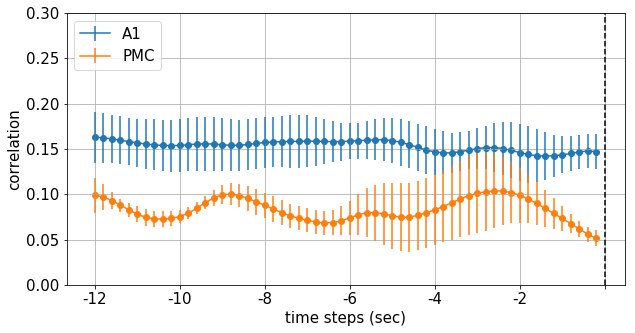

time: 625 ms


In [35]:

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(lag),corr_a1_mean, yerr=corr_a1_std, label='A1')
plt.scatter(np.arange(lag),corr_a1_mean)
# plt.plot(a1_event_mean, label='A1')
plt.errorbar(np.arange(lag),corr_pmc_mean, yerr=corr_pmc_std, label='PMC')
plt.scatter(np.arange(lag),corr_pmc_mean)
# plt.plot(pmc_event_mean,label='PMC')
plt.ylim(0,0.3)
# plt.ylim(0.7,0.9)
# plt.title("average unscram data - average intact data")
plt.xticks(np.arange(0,lag+1,10),np.arange(-12,0,2), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("correlation", fontsize=15)
plt.xlabel("time steps (sec)", fontsize=15)
plt.axvline(x=lag, linestyle='--', color = 'k')
plt.legend(fontsize=15)
plt.grid()


plt.show()

In [31]:
lag = 60
corr_a1_mean, corr_pmc_mean=([] for i in range(2))
corr_a1_sbj, corr_pmc_sbj=([] for i in range(2))
a1_event, pmc_event=([] for i in range(2))
for s in range(22):
    d=duration2[0]
    print(s)
    for i in duration2[1:-1]:
        a1_event.append(corr_a1[s][d:d+lag])
        pmc_event.append(corr_pmc[s][d:d+lag])
        d=d+i

        a1_event_mean=np.mean(a1_event,0)
        pmc_event_mean=np.mean(pmc_event,0) 
    
    corr_a1_sbj.append(a1_event_mean)
    corr_pmc_sbj.append(pmc_event_mean)

corr_a1_mean = np.mean(corr_a1_sbj,0)
corr_pmc_mean = np.mean(corr_pmc_sbj,0)
corr_a1_std = np.std(corr_a1_sbj,0)
corr_pmc_std = np.std(corr_pmc_sbj,0)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
time: 2.05 s


In [29]:
from scipy import stats
#correlation of the end of the events for mean intact and mean unscramble
lag = 60
corr_a1_mean, corr_pmc_mean=([] for i in range(2))
a1_event, pmc_event=([] for i in range(2))
d=duration2[0]
for i in duration2[1:-1]:
    a1_event.append(corr_a1[d:d+lag])
    pmc_event.append(corr_pmc[d:d+lag])
    d=d+i


corr_a1_mean = np.mean(a1_event,0)
corr_pmc_mean = np.mean(pmc_event,0)
corr_a1_std = stats.sem(a1_event,0)
corr_pmc_std = stats.sem(pmc_event,0)
    

time: 26.6 ms


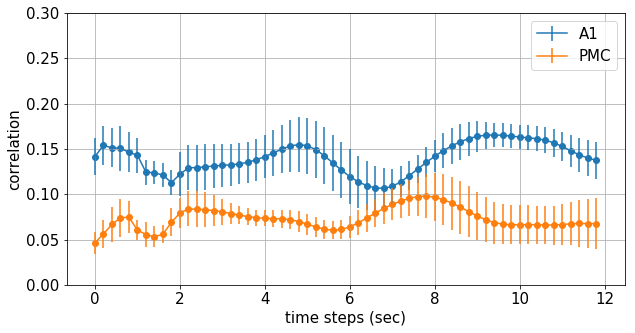

time: 518 ms


In [33]:

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(lag),corr_a1_mean, yerr=corr_a1_std, label='A1')
plt.scatter(np.arange(lag),corr_a1_mean)
# plt.plot(a1_event_mean, label='A1')
plt.errorbar(np.arange(lag),corr_pmc_mean, yerr=corr_pmc_std, label='PMC')
plt.scatter(np.arange(lag),corr_pmc_mean)
# plt.plot(pmc_event_mean,label='PMC')
plt.ylim(0,0.3)
# plt.ylim(0.7,0.9)
# plt.title("average unscram data - average intact data")
plt.xticks(np.arange(0,lag+1,10),np.arange(0,14,2), fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("correlation", fontsize=15)
plt.xlabel("time steps (sec)", fontsize=15)
# plt.axvline(x=lag, linestyle='--', color = 'k')
plt.legend(fontsize=15)
plt.grid()


plt.show()

In [ ]:
np.mean(a1_event_mean)